# Reading and Displaying

### images

In [1]:
import cv2 as cv
import numpy as np

In [2]:
img=cv.imread('cat.jpg')

In [4]:
cv.imshow("cats",img)
cv.waitKey(0)

-1

In [5]:
img=cv.imread('cat_large.jpg')
cv.imshow("cat large",img)
cv.waitKey(0)

-1

### videos

In [6]:
capture=cv.VideoCapture('dog.mp4')
while True:
    istrue,frame=capture.read()
    cv.imshow("video",frame)
    
    if cv.waitKey(20) & 0xFF==ord(' '):  # means the video will stop on pressing spacebar
        break

capture.release()
cv.destroyAllWindows()
    

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


-215: Assertion failed error appears becouse the while loop did'nt had any more frames to show as the video ended
this error also appears if wrong file path is mentioned

### webcam

In [2]:
capture=cv.VideoCapture(0)  # 0 is number of our webcam , if many are connected specify the correct number
while True:
    istrue,frame=capture.read()
    cv.imshow("video",frame)
    
    if cv.waitKey(20) & 0xFF==ord(' '):
        break

# Resizing and Rescaling

In [4]:

# function to rescale images, videos, live video

def framerescale(frame,scale=0.75):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions=(width,height)
    
    return cv.resize(frame,dimensions, interpolation= cv.INTER_AREA)

capture=cv.VideoCapture('dog.mp4')
while True:
    istrue,frame=capture.read()
    
    frameresize=framerescale(frame)
    
    cv.imshow("video",frame)
    cv.imshow("resized video",frameresize)
    
    if cv.waitKey(20) & 0xFF==ord(' '):  # means the video will stop on pressing spacebar
        break

capture.release()
cv.destroyAllWindows()
    


In [5]:
# function to resize only for live video

def frameresize(width,height):
    capture.set(3,width)
    capture.set(4,height)    # 10 can be used for brightness
    

# Drawing Shapes and Putting Text

In [3]:
blank=np.zeros((500,500,3),dtype='uint8')  # a blank image , 0 is for black
cv.imshow("blank",blank)
cv.waitKey(0)

-1

### painting the image a certain color

In [7]:
# painting whole image 

blank[:]=0,255,0   # bgr code for green
cv.imshow("green",blank)
cv.waitKey(0)


-1

In [4]:
# painting certain portion of image

blank[200:300,300:400]=0,255,0   # bgr code for green
cv.imshow("green",blank)
cv.waitKey(0)


-1

### drawing rectangle

In [5]:
cv.rectangle(blank,(0,0),(250,250),(0,0,255),thickness=2)
#           ( image,strting point, diagnol pt, color, thickness)

cv.imshow('rectangle',blank)
cv.waitKey(0)

-1

In [6]:
# to fill the rectangle

cv.rectangle(blank,(0,0),(250,250),(0,0,255),thickness=cv.FILLED)   # instead of cv.FILLED we can use -1 to fill
cv.imshow('rectangle',blank)
cv.waitKey(0)

-1

### drawing circle

In [7]:
cv.circle(blank,(250,250),30,(255,0,0),thickness=2)
#        (image,centre,radius,color,thickness)

cv.imshow('circle',blank)
cv.waitKey(0)

-1

### drawing line

In [8]:
cv.line(blank,(0,0),(250,250),(255,255,0),thickness=2)
#      ( image,strting pt,ending pt,color,thickness)

cv.imshow('line',blank)
cv.waitKey(0)

-1

### writing text on image

In [10]:
cv.putText(blank,'soha',(255,255),cv.FONT_HERSHEY_TRIPLEX,1,(0,255,255),thickness=2)
#         (image,text,strting pt.,font,scale,color,thickness)

cv.imshow('text',blank)
cv.waitKey(0)

-1

# 5 Essential Functions

### converting image to grayscale

In [12]:
img=cv.imread('cat.jpg')

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#               (image,color code)

cv.imshow("cats",img)
cv.imshow("gray",gray)
cv.waitKey(0)

-1

In [14]:
img=cv.imread('park.jpg')

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#               (image,color code)

cv.imshow("cats",img)
cv.imshow("gray",gray)
cv.waitKey(0)

-1

### blur an image

In [17]:
blur=cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)                   # to increase blur increase kernel size
#                   (image,kernel size [has to be odd],sigmaX)

cv.imshow("blur",blur)
cv.waitKey(0)

-1

### edge cascade

In [18]:
canny=cv.Canny(img,125,175)
cv.imshow("canny edges",canny)
cv.waitKey(0)

-1

if we pass a blur image there will be far less edges

### dilating the image

In [23]:
dilated=cv.dilate(canny,(3,3),iterations=1)
#                (image,kernel size,iterations)

cv.imshow('dilate',dilated)
cv.waitKey(0)

-1

### eroding the image

In [24]:
eroded=cv.erode(dilated,(7,7),iterations=1)

cv.imshow('eroded',eroded)
cv.waitKey(0)

-1

### resize the image

In [2]:
img=cv.imread('park.jpg')
resized=cv.resize(img,(500,500))
cv.imshow('resized',resized)
cv.waitKey(0)

-1

### cropping the image

In [3]:
cropped=img[50:210,350:450]
cv.imshow('cropped',cropped)
cv.waitKey(0)

-1

# Image Transformations

### translation

translation is basically shifting image along x and y axis

In [2]:
img=cv.imread('park.jpg')

def translate(image,x,y):
    transmat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (image.shape[1],image.shape[0])
    return cv.warpAffine(img,transmat,dimensions)

# -x -> left
# -y -> up
# +x -> right
# +y -> down

translated = translate(img,100,100)
cv.imshow('translated',translated)
cv.waitKey(0)
    

-1

### rotation

In [6]:
def rotate(image,angle,rotpt=None):
    (height,width) = image.shape[:2]
    
    if rotpt is None:    # assume that we are going to rotate about the center
        rotpt = (width//2,height//2)    # center coordinates
        
    rotmat = cv.getRotationMatrix2D(rotpt,angle,1.0)
    #                              (center,angle,scale)
    
    dimensions=(width,height)
    
    return cv.warpAffine(image,rotmat,dimensions)

# + angle -> anti-clockwise rotation
# - angle -> clockwise rotation

rotated = rotate(img,45)
cv.imshow('rotated',rotated)
cv.waitKey(0)
    

-1

### resizing

In [10]:
resized = cv.resize(img,(500,500),interpolation=cv.INTER_CUBIC)

# if shrinking use INTER_AREA
# if enlarging  use INTER_LINEAR or INTER_CUBIC
# INTER_CUBIC is slow but image is better

cv.imshow('resized',resized)
cv.imshow('image',img)
cv.waitKey(0)

-1

### flipping

In [12]:
flip=cv.flip(img,-1)
#           (image,flip code)

# flip code can be 0,1,-1
# 0 -> flipping vertically / over the x axis
# 1 -> flipping horizontally / over the y axis
# -1 -> flipping both vertically and horizontally

cv.imshow('flipped',flip)
cv.waitKey(0)

-1

### cropping

In [3]:
cropped = img[10:200,200:300]
cv.imshow('cropped',cropped)
cv.waitKey(0)

-1

# Contour Detection

contours are basically boundaries of objects. line or curve that joins the continuous points along the boundary of an object.


In [ ]:
img=cv.imread('cats.jpg')

cv.imshow('cat',img)

# converting to gray scale
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

canny = cv.Canny(img,125,175)
cv.imshow('canny',canny)

contours,heirarchies = cv.findContours(canny, cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
#                                     (edges,mode,contour approximation)

print(f'{len(contours)} contours found')

cv.waitKey(0)

2794 contours found


In [ ]:
contours,heirarchies = cv.findContours(canny, cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
#                                     (edges,mode,contour approximation)

print(f'{len(contours)} contours found')

In [7]:
blur = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)

canny = cv.Canny(blur,125,175)
cv.imshow('canny',canny)

contours,heirarchies = cv.findContours(canny, cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
#                                     (edges,mode,contour approximation)

print(f'{len(contours)} contours found')

cv.waitKey(0)

380 contours found


-1

In [8]:
contours,heirarchies = cv.findContours(canny, cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
#                                     (edges,mode,contour approximation)

print(f'{len(contours)} contours found')


380 contours found


In [3]:
img = cv.imread('cats.jpg')
blank = np.zeros(img.shape,dtype='uint8')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret , thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
#                         (image, threshold value, max. value, type)

cv.imshow('thresh',thresh)

contours,heirarchies = cv.findContours(thresh, cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
#                                     (edges,mode,contour approximation)

print(f'{len(contours)} contours found')

# drawing contours on blank image
cv.drawContours(blank,contours,-1,(0,0,255),1)    # -1 for all contours to be drawn
#              (image to draw over, list of contours, contours index[how many contours to draw],color,thickness)

cv.imshow('contours',blank)
cv.waitKey(0)

839 contours found


-1

# Color Spaces

In [2]:
img=cv.imread('park.jpg')
cv.imshow('image',img)

# BGR to grayscale
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

# BGR to HSV[hue saturation value]
# HSV is based on how humans think and concieve colors
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)

cv.waitKey(0)

-1

In [4]:
# BGR to l*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)
cv.waitKey(0)

-1

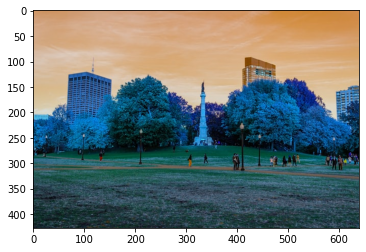

In [5]:
# opencv read images in BGR format , but if we open image with other python library they read in RGB format

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [6]:
# BGR to RGB

rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)
cv.waitKey(0)

-1

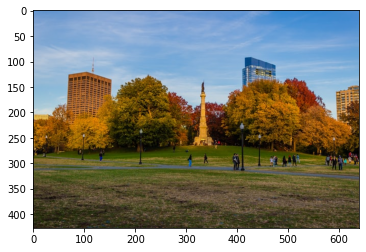

In [7]:
plt.imshow(rgb)
plt.show()

In [3]:
# we cannot convert grayscale to hsv directly

# hsv to bgr

hsvbgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
cv.imshow('bgr',hsvbgr)
cv.waitKey(0)

-1

# Color Channels

### splitting

In [4]:
img = cv.imread('park.jpg')
cv.imshow('image',img)

# splitting the image into respective color channels
b,g,r = cv.split(img)
cv.imshow('blue',b)
cv.imshow('green',g)
cv.imshow('red',r)

# lighter the image part , more pixels of that color present in that part
cv.waitKey(0)

-1

In [6]:
print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


### merging

In [3]:
# merging these color channels together

merged = cv.merge([b,g,r])
#                (list of images to be merged)

cv.imshow('merged',merged)
cv.waitKey(0)

-1

In [5]:
blank = np.zeros(img.shape[:2],dtype='uint8')

blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

cv.imshow('blue',blue)
cv.imshow('red',red)
cv.imshow('green',green)

cv.waitKey(0)

-1

# Blurring Techniques

In [2]:
img = cv.imread('cats.jpg')
cv.imshow('cats',img)
cv.waitKey(0)

-1

kernel size - it is basically the no. of rows and columns of a window of an image

### averaging 

we define a kernel window over a specific portion of an image . this window will compute the pixel intensity of the middle pixel of the true centre as the average of the surrounding pixel intensities.

In [14]:
av = cv.blur(img , (7,7))
#           (image , kernel size)

# higher the kernel size , more blur will be the image
cv.imshow('av. blur',av)
cv.imshow('image',img)
cv.waitKey(0)

-1

### Gaussian blur

Gaussian blur does the same thing as averaging except that instead of calculating the average of all the running pixel intensity , each running pixel is given a particular weight, and the average of the products of those weights gives the value of the true center. 

In [15]:
gauss = cv.GaussianBlur(img,(7,7),0)
#                      (image, kernel size, sigmaX[standard deviation along x axis])

cv.imshow('gauss',gauss)
cv.imshow('av. blur',av)
cv.waitKey(0)

-1

### median blur

median blur is same thing as averaging , except that instead of finding the average of the surrounding pixels, it finds the median of the surrounding pixels. Median blurring tends to be more effective in reducing the noice in the image as compared to averaging and Gaussian Blur.

In [4]:
median = cv.medianBlur(img,3) # here kernel size is just an integer instead of a tuple
#                    (image , kernel size)

cv.imshow('median blur',median)
cv.imshow('image',img)
cv.waitKey(0)

-1

### bilateral blur

bilateral blurring is most effective and sometimes used in lot of advanced computer vision projects. Bilateral blurring applies blurring but retains the edges in the image 

In [8]:
bb = cv.bilateralFilter(img,10,35,25)
#                      (image, diameter of pixel neighbourhood, sigma color,sigma space)

# sigma color -> larger value means there are more colors in the neighbourhood that will be considered when blur is computed
# sigma space -> larger value means the pixel firther away from central pixel will influence the blurring calculation

cv.imshow('bilateral',bb)
cv.imshow('image',img)
cv.waitKey(0)

-1

# Bitwise Operations

In [1]:
import cv2 as cv
import numpy as np

In [4]:
blank = np.zeros((400,400),dtype='uint8')

rectangle = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(),(200,200),200,255,-1)

cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)

cv.waitKey(0)

-1

### bitwise AND

In [5]:
# takes to images and return their intersection

bitand = cv.bitwise_and(rectangle,circle)
#                      (image 1,image 2)
cv.imshow('bitwise and ',bitand)
cv.waitKey(0)

-1

### bitwise OR

In [6]:
# takes to images and return their union

bitor = cv.bitwise_or(rectangle,circle)
cv.imshow('or',bitor)
cv.waitKey(0)

-1

### bitwise XOR

In [7]:
# takes two images and return the non-intersecting region

bitxor = cv.bitwise_xor(rectangle,circle)
cv.imshow('xor',bitxor)
cv.waitKey(0)

-1

### bitwise not

In [8]:
# takes one image and inverts its color

bitnot = cv.bitwise_not(rectangle)
cv.imshow('not',bitnot)
cv.waitKey(0)

-1

# Masking

In [2]:
# mask should be of same size as that of image

img = cv.imread('cats.jpg')
cv.imshow('image',img)

blank = np.zeros(img.shape[:2],dtype='uint8')

mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
cv.imshow('mask',mask)
cv.waitKey(0)

-1

In [3]:
masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('masked ',masked)
cv.waitKey(0)

-1

# Computing Histograms

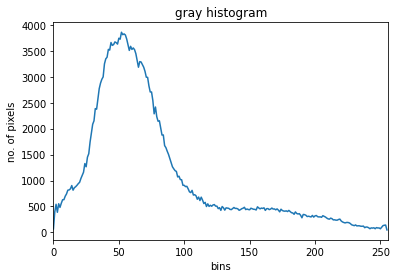

In [2]:
import matplotlib.pyplot as plt

img = cv.imread('cats.jpg')
cv.imshow('image',img)

# histograms for grayscale images

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ghist = cv.calcHist([gray],[0],None,[256],[0,256])     # 0 is for gray
#                  (list of images,list of channels, mask,histsize[no. of bins],range of all possible pixel values)

plt.figure()
plt.title('gray histogram')
plt.xlabel('bins')
plt.ylabel('no. of pixels')
plt.plot(ghist)
plt.xlim([0,256])
plt.show()

### plotting histogram of masked image


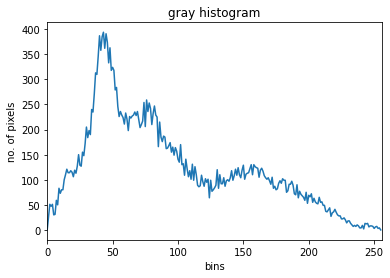

In [6]:
blank = np.zeros(img.shape[:2],dtype='uint8')
mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),100,255,-1)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
masked = cv.bitwise_and(gray,gray,mask=mask)
cv.imshow('masked ',masked)
cv.waitKey(0)
ghist = cv.calcHist([gray],[0],masked,[256],[0,256])
plt.figure()
plt.title('gray histogram')
plt.xlabel('bins')
plt.ylabel('no. of pixels')
plt.plot(ghist)
plt.xlim([0,256])
plt.show()

### histograms for colored images

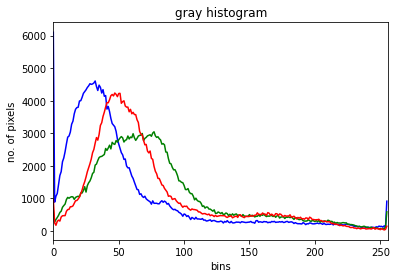

In [7]:
plt.figure()
plt.title('gray histogram')
plt.xlabel('bins')
plt.ylabel('no. of pixels')
colors=('b','g','r')
for i,cols in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=cols)
    plt.xlim([0,256])
plt.show()

# Thresholding

thresholding is binarization of image.
we set a threshold value, if the pixel is less than that ,then it converts to 0(black) otherwisw 255(white)

### simple thresholding

In [1]:
import cv2 as cv

In [2]:
img = cv.imread('cats.jpg')
cv.imshow('cats',img)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

threshold, thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY)
#                               (image,threshold value,pixel to convert to if pixel value is greater than threhold value,type)

# thresh is the binary image 
# threshold is the same value we passed in as threshold value in the function

cv.imshow('simple threshold',thresh)
cv.waitKey(0)

-1

In [3]:
# inverse thresholded image

threshold, threshinv = cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)
cv.imshow('simple threshold inverse',threshinv)
cv.waitKey(0)

-1

### adaptive threshold

In [12]:
adap = cv.adaptiveThreshold(gray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,3)
#                          (image, max value,adaptive method,threshold type,neigbourhood size of kernel,c value)

cv.imshow('adaptive threshold',adap)
cv.waitKey(0)

-1

# edge detection

In [10]:
img = cv.imread('cat.jpg')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

### laplacian (looks like sketch)

In [11]:
import numpy as np

lap = cv.Laplacian(gray,cv.CV_64F)
#                 (image, data depth)

lap = np.uint8(np.absolute(lap))

cv.imshow('laplacian',lap)
cv.waitKey(0)

-1

### sobel

this calculates gradient in x and y direction

In [12]:
sobelx = cv.Sobel(gray,cv.CV_64F,1,0)
#                (image,data depth, x,y)

sobely = cv.Sobel(gray,cv.CV_64F,0,1)
combined = cv.bitwise_or(sobelx,sobely)
cv.imshow('sobel x',sobelx)
cv.imshow('sobel y',sobely)
cv.imshow('sobel',combined)
cv.waitKey(0)

-1